In [2]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used scaling
from sklearn.preprocessing import MinMaxScaler

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("sensor_data.csv")

In [6]:
# Calculate the number of missing entries per feature
missing_counts = df.isna().sum()

# Print the feature names and their missing counts
for feature, count in missing_counts.items():
    print(f"Feature: {feature}, Missing Entries: {count}")

Feature: timestamp, Missing Entries: 0
Feature: mac, Missing Entries: 0
Feature: boardtype, Missing Entries: 0
Feature: boardid, Missing Entries: 0
Feature: temp_max, Missing Entries: 0
Feature: temp_min, Missing Entries: 0
Feature: temp_avg, Missing Entries: 0
Feature: light_max, Missing Entries: 0
Feature: light_min, Missing Entries: 0
Feature: light_avg, Missing Entries: 0
Feature: humidity_min, Missing Entries: 0
Feature: humidity_max, Missing Entries: 0
Feature: humidity_avg, Missing Entries: 0
Feature: model, Missing Entries: 0
Feature: latitude, Missing Entries: 0
Feature: longitude, Missing Entries: 0
Feature: elevation, Missing Entries: 21595
Feature: location, Missing Entries: 0
Feature: rowid, Missing Entries: 0
Feature: Position, Missing Entries: 56570
Feature: geolocation, Missing Entries: 0


In [8]:
# Drop column Position because this column does not have any observation
column_to_drop = 'Position'
df = df.drop(columns=[column_to_drop])

print(df)

                       timestamp               mac  boardtype  boardid  \
0      2015-01-24T16:15:00+05:30  0013a20040b31571          1      510   
1      2015-01-24T16:45:00+05:30  0013a20040b5b337          1      511   
2      2015-01-24T16:45:00+05:30  0013a20040b31583          1      509   
3      2015-01-24T17:25:00+05:30  0013a20040b31583          1      509   
4      2015-01-24T17:25:00+05:30  0013a20040b31571          1      510   
...                          ...               ...        ...      ...   
56565  2015-01-05T16:45:00+05:30  0013a20040b31583          1      509   
56566  2015-01-05T16:50:00+05:30  0013a20040b4b755          1      508   
56567  2015-01-05T16:55:00+05:30  0013a20040b31583          1      509   
56568  2015-01-05T16:55:00+05:30  0013a20040b31571          1      510   
56569  2015-01-05T16:55:00+05:30  0013a20040b516ed          1      505   

       temp_max  temp_min  temp_avg  light_max  light_min  light_avg  \
0          19.4      19.4      19.4    

In [10]:
# Getting more information of our dataset to confirm that the column position is dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

<Axes: xlabel='elevation', ylabel='Density'>

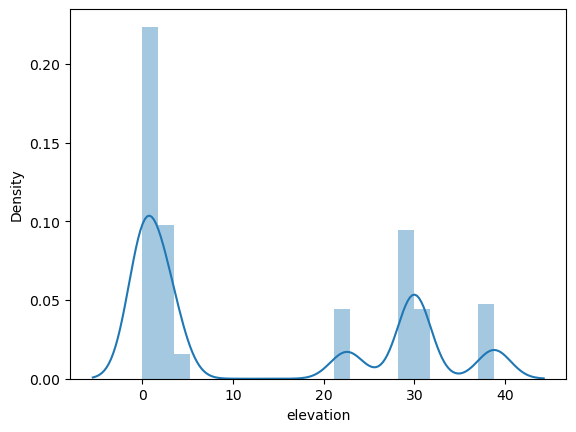

In [12]:
sns.distplot(df.elevation)

As data seems little positively skewed, we will replace age null values with median

In [15]:
df["elevation"] = df["elevation"].replace(np.NaN, df["elevation"].median())

In [17]:
# Calculate the number of missing entries per feature
missing_counts = df.isna().sum()

# Print the feature names and their missing counts
for feature, count in missing_counts.items():
    print(f"Feature: {feature}, Missing Entries: {count}")

Feature: timestamp, Missing Entries: 0
Feature: mac, Missing Entries: 0
Feature: boardtype, Missing Entries: 0
Feature: boardid, Missing Entries: 0
Feature: temp_max, Missing Entries: 0
Feature: temp_min, Missing Entries: 0
Feature: temp_avg, Missing Entries: 0
Feature: light_max, Missing Entries: 0
Feature: light_min, Missing Entries: 0
Feature: light_avg, Missing Entries: 0
Feature: humidity_min, Missing Entries: 0
Feature: humidity_max, Missing Entries: 0
Feature: humidity_avg, Missing Entries: 0
Feature: model, Missing Entries: 0
Feature: latitude, Missing Entries: 0
Feature: longitude, Missing Entries: 0
Feature: elevation, Missing Entries: 0
Feature: location, Missing Entries: 0
Feature: rowid, Missing Entries: 0
Feature: geolocation, Missing Entries: 0


The median is a measure of central tendency that is robust to outliers. Unlike the mean, which extreme values can heavily influence, the median provides a better central value when the dataset contains outliers or skewed distributions.

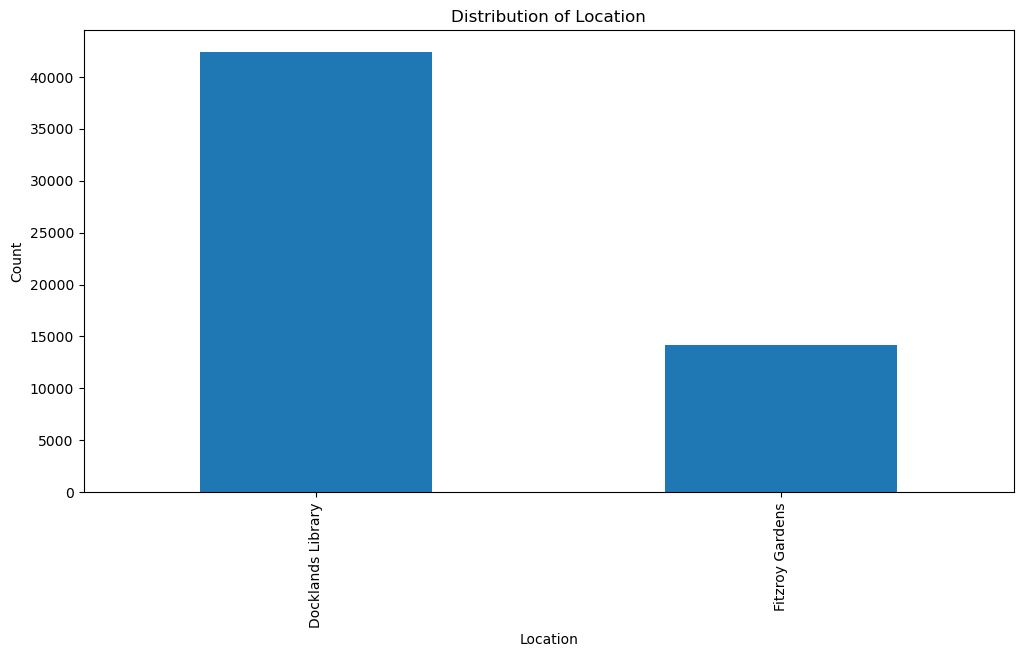

In [27]:
location_counts = df['location'].value_counts()

plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Location')
plt.show()

In [37]:
total_each_location = df['location'].value_counts()
print(total_each_location)

location
Docklands Library    42381
Fitzroy Gardens      14189
Name: count, dtype: int64


In [ ]:
The histogram show the count of occurrences for each unique location, we can see that there are only two unique locations which are Docklands Libraty which has a total of 42381 and Fitzroy Gardens which has 14189, we can see that the distribution is not balance with Docklands Library having trice as much counts than the Fitzroy Gardens.   

In [43]:
# Using one-hot encoding for categorical variable location
location_one_hot = pd.get_dummies(df['location'], prefix='location')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, location_one_hot], axis=1)

# Display the one-hot encoded columns
print(location_one_hot)

       location_Docklands Library  location_Fitzroy Gardens
0                            True                     False
1                            True                     False
2                            True                     False
3                            True                     False
4                            True                     False
...                           ...                       ...
56565                        True                     False
56566                       False                      True
56567                        True                     False
56568                        True                     False
56569                       False                      True

[56570 rows x 2 columns]


One-Hot Encoding results are in binary columns, each representing one category. Each column in the encoded data corresponds to a specific category. This representation makes it easier to understand how each category affects the model.

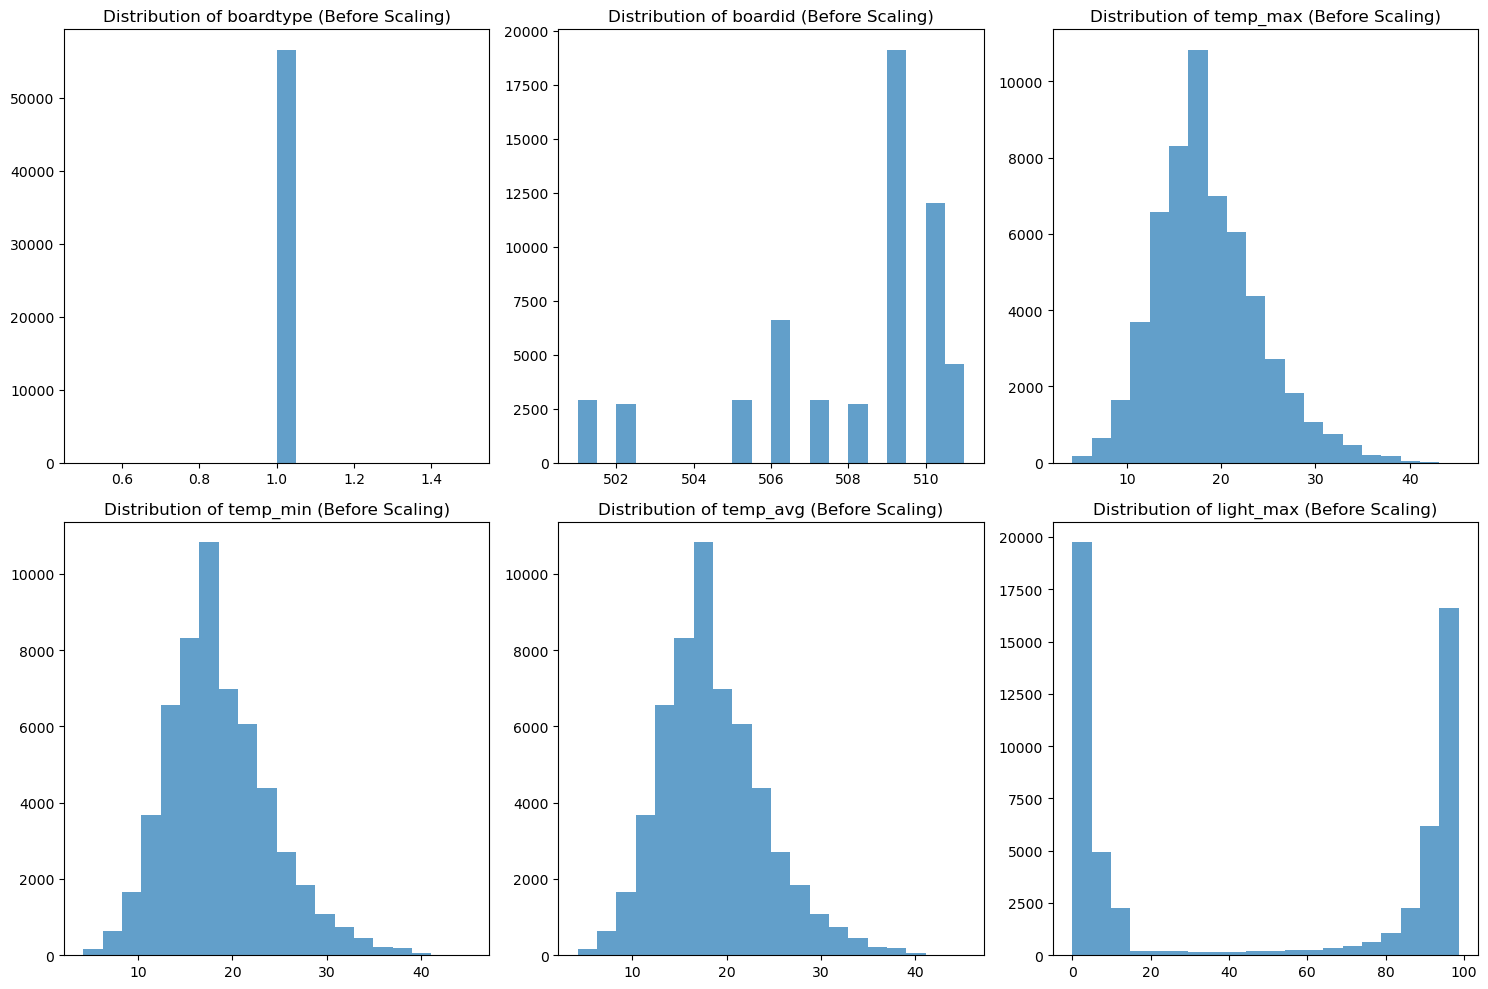

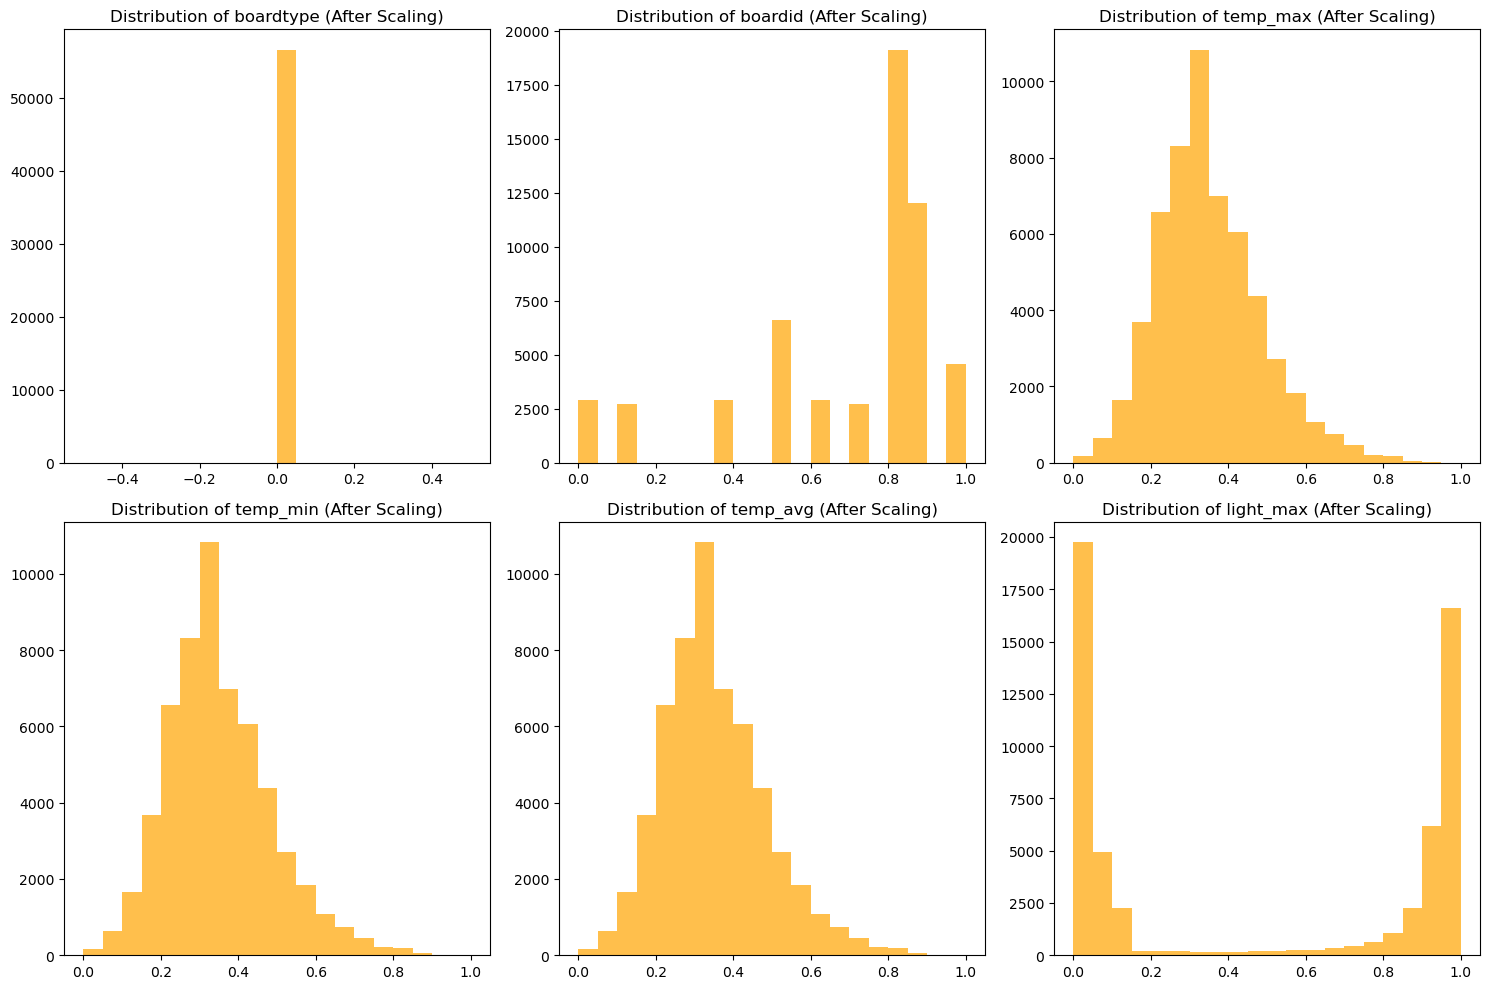

In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming the DataFrame is named 'df'
features = ['boardtype', 'boardid', 'temp_max', 'temp_min', 'temp_avg', 'light_max', 'light_min', 'light_avg', 'humidity_min', 'humidity_max', 'humidity_avg']

# Plot distribution before scaling
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features[:6]):
    plt.subplot(2, 3, i+1)
    plt.hist(df[feature], bins=20, alpha=0.7)
    plt.title(f'Distribution of {feature} (Before Scaling)')
plt.tight_layout()
plt.show()

# Apply min-max scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Plot distribution after scaling
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features[:6]):
    plt.subplot(2, 3, i+1)
    plt.hist(df_scaled[feature], bins=20, alpha=0.7, color='orange')
    plt.title(f'Distribution of {feature} (After Scaling)')
plt.tight_layout()
plt.show()

As we can see from the plots of the six features before and scaling there is no difference. After applying min-max scaling, the distributions of the features should change to a range between 0 and 1. Min-max scaling transforms the data to a common scale, preserving the shape of the original distribution while ensuring that all features have the same scale. 